# Linear Regression

In [1]:
# If you are on a machine with intel cpu, you can use the following code to enable the intel mkl library for better performance
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(8,5)

Simple linear regression experiment

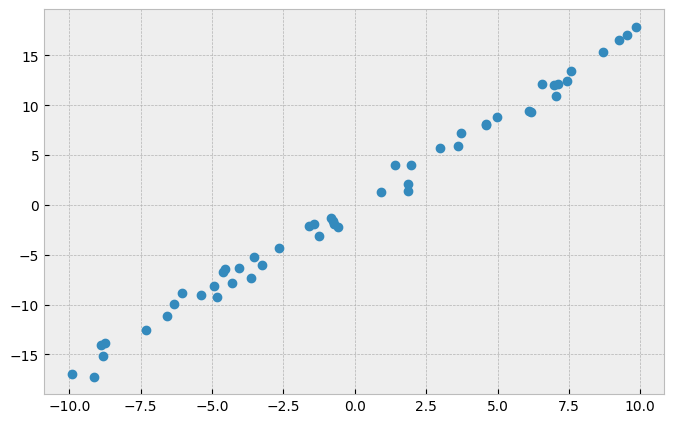

In [3]:
# Generate random samples
#X = np.random.normal(0, 3, size=(50,1))
X  = np.random.uniform(-10, 10, size=(50,1))
hidden_params = 1.72
Y = X @ [hidden_params] + np.random.normal(0, 1, size=X.shape[0])  
# plot it
plt.plot(X, Y, 'o');

In [4]:
# use  lstsq from numpy
a = np.linalg.lstsq(X, Y)[0]
a

/tmp/ipykernel_953030/156270556.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a = np.linalg.lstsq(X, Y)[0]


array([1.70695293])

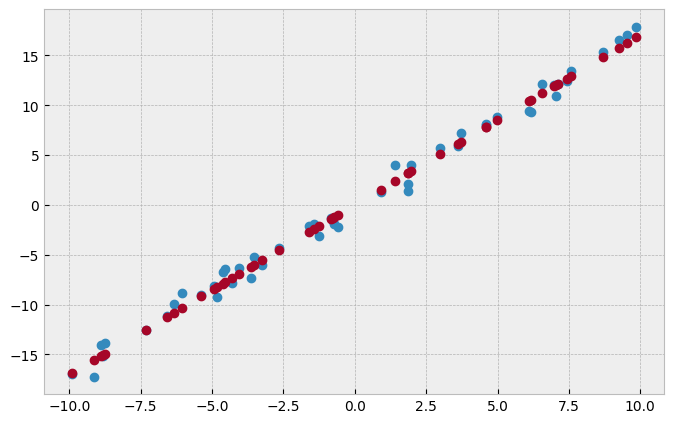

In [5]:
# let us plot it
plt.plot(X, Y, 'o')
plt.plot(X, X @ a, 'o');

## Q 
How to add the bias term?

Hint: Try `np.concatenate`, `np.ones_like`

$y= a x + b$

$ y = (x, 1) \cdot (a, b)$ 

In [6]:
X

array([[-1.44453918],
       [ 6.17827457],
       [-7.3255183 ],
       [ 1.98654806],
       [-6.06131407],
       [-4.62218304],
       [-4.31368833],
       [ 3.71469618],
       [-4.94116394],
       [ 7.0308983 ],
       [ 2.97558507],
       [-0.71977329],
       [-3.52817424],
       [ 8.70088976],
       [ 9.5434103 ],
       [-4.81763626],
       [-3.64722352],
       [-6.58510649],
       [ 1.40986137],
       [ 1.8501952 ],
       [-8.74438934],
       [-9.14601071],
       [ 4.99668339],
       [ 9.8470301 ],
       [ 1.87558826],
       [ 4.60226051],
       [-1.60775281],
       [-3.24324739],
       [-0.577924  ],
       [-6.33350114],
       [ 3.601032  ],
       [ 9.25447325],
       [-0.7681322 ],
       [-8.81556952],
       [ 7.57467746],
       [ 7.10527426],
       [-5.38185919],
       [-1.25985461],
       [ 6.10949521],
       [-4.53471131],
       [ 7.42160136],
       [-8.88606652],
       [-2.65526197],
       [ 6.99184132],
       [-4.05271522],
       [-0

a= [ 2.96578634 14.80508366]


/tmp/ipykernel_953030/248626584.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a = np.linalg.lstsq(X, Y)[0]


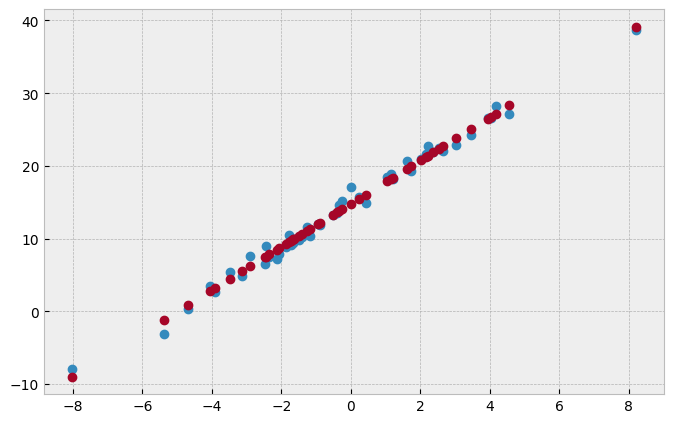

In [7]:
# %load q_lstsq.py
# constant term
# generate random data
X = np.random.normal(0, 3, size=(50,1))
one = np.ones_like(X)
X = np.concatenate([X, one], axis=1)
Y = X @ [3, 15] + np.random.normal(0, size=50)
# using numpy's lstsq
a = np.linalg.lstsq(X, Y)[0]
print("a=", a)
# plot the results
plt.plot(X[:, 0], Y, 'o')
plt.plot(X[:, 0], X @ a, 'o');

## sklearn is more suitable for this job

In [8]:
from sklearn import linear_model

In [9]:
X = np.random.normal(0, 3, size=(50,1))
Y = X @ [3] + 4 +np.random.normal(0, 1, size=50)

In [10]:
regr = linear_model.LinearRegression()
regr

LinearRegression()

In [11]:
regr.fit(X, Y)
print(regr.coef_, regr.intercept_)

[3.07469516] 3.9974812395631605


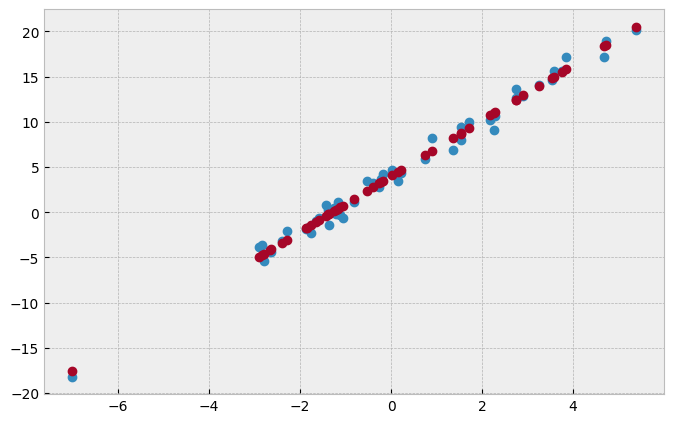

In [12]:
# Plot the results
plt.plot(X, Y, 'o')
plt.plot(X, regr.predict(X), 'o');

## Q
plot `test_X = np.linspace(-10,10, 100)` 

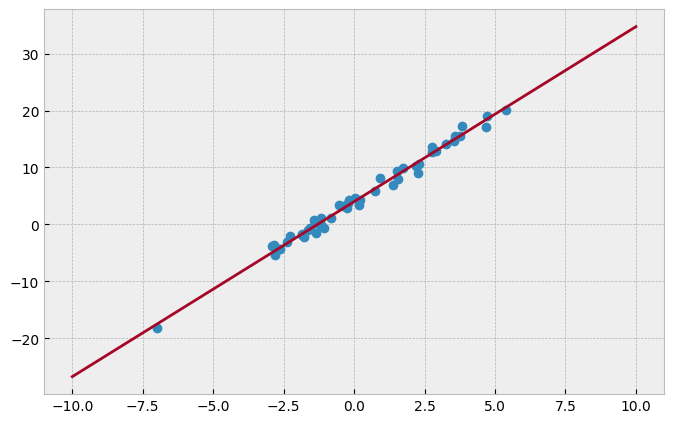

In [13]:
# %load q_linear_test.py
test_X = np.linspace(-10,10, 100)[:, np.newaxis]
plt.plot(X, Y, 'o')
plt.plot(test_X, regr.predict(test_X));

### Use sklearn datasets to explore sample datasets

In [14]:
from sklearn import datasets

In [15]:
datasets.load_diabetes?

Signature: datasets.load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)
Docstring:
Load and return the diabetes dataset (regression).

==============   ==================
Samples total    442
Dimensionality   10
Features         real, -.2 < x < .2
Targets          integer 25 - 346
==============   ==================

.. note::
   The meaning of each feature (i.e. `feature_names`) might be unclear
   (especially for `ltg`) as the documentation of the original dataset is
   not explicit. We provide information that seems correct in regard with
   the scientific literature in this field of research.

Read more in the :ref:`User Guide <diabetes_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

as_frame : bool, default=False
    If True, the data is a pandas DataFrame including columns with
    a

In [16]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [17]:
import scipy.stats

In [18]:
scipy.stats.describe(diabetes.data)

DescribeResult(nobs=442, minmax=(array([-0.10722563, -0.04464164, -0.0902753 , -0.1123988 , -0.12678067,
       -0.11561307, -0.10230705, -0.0763945 , -0.12609712, -0.13776723]), array([0.11072668, 0.05068012, 0.17055523, 0.13204362, 0.15391371,
       0.19878799, 0.18117906, 0.18523444, 0.13359728, 0.13561183])), mean=array([-1.44429466e-18,  2.54321451e-18, -2.25592546e-16, -4.85408596e-17,
       -1.42859580e-17,  3.89881064e-17, -6.02836031e-18, -1.78809958e-17,
        9.24348582e-17,  1.35176953e-17]), variance=array([0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
       0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757]), skewness=array([-0.23059556,  0.12695182,  0.59611666,  0.28967104,  0.37682382,
        0.43510876,  0.79654015,  0.73287568,  0.29076268,  0.20721035]), kurtosis=array([-0.67719869, -1.98388324,  0.08047813, -0.54033323,  0.21677706,
        0.58105569,  0.95689553,  0.42584638, -0.14639566,  0.22070114]))

In [19]:
idx = np.arange(diabetes.data.shape[0])
np.random.shuffle(idx)
X = diabetes.data[idx]
y = diabetes.target[idx]

Try linear regression on this dataset

3774.1041027104166

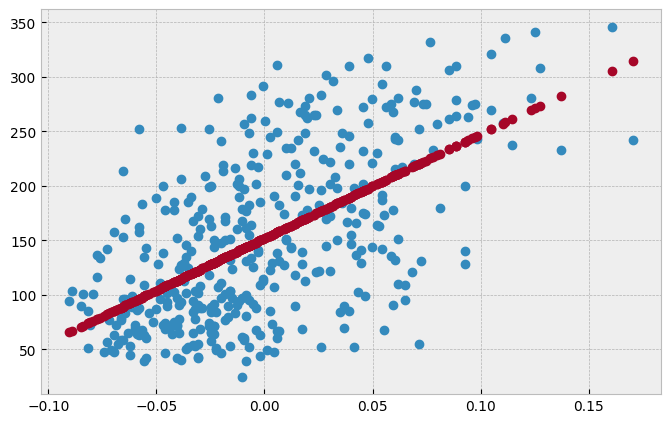

In [20]:
num_test_samples = 50
features_idx = 2
train_X = X[:-num_test_samples, features_idx:features_idx+1]
train_y = y[:-num_test_samples]
test_X = X[-num_test_samples:, features_idx:features_idx+1]
test_y = y[-num_test_samples:]
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)
plt.plot(train_X, train_y, 'o');
plt.plot(train_X, regr.predict(train_X), 'o');
np.mean((regr.predict(train_X)-train_y)**2)

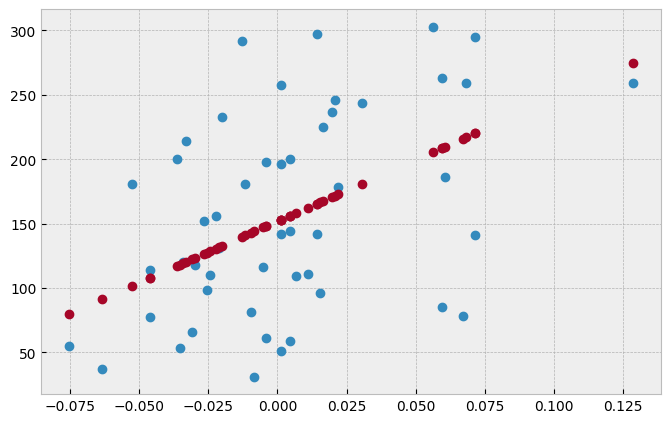

In [21]:
plt.plot(test_X, test_y, 'o');
plt.plot(test_X, regr.predict(test_X), 'o');

In [22]:
np.mean((regr.predict(test_X)-test_y)**2)

4804.281370921703

### Use all input from X

In [23]:
train_X = X[:-50]
train_y = y[:-50]
test_X = X[-50:]
test_y = y[-50:]
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)
np.mean((regr.predict(train_X)-train_y)**2)

2786.0641782744374

In [24]:
np.mean((regr.predict(test_X)-test_y)**2)

3491.382904372669

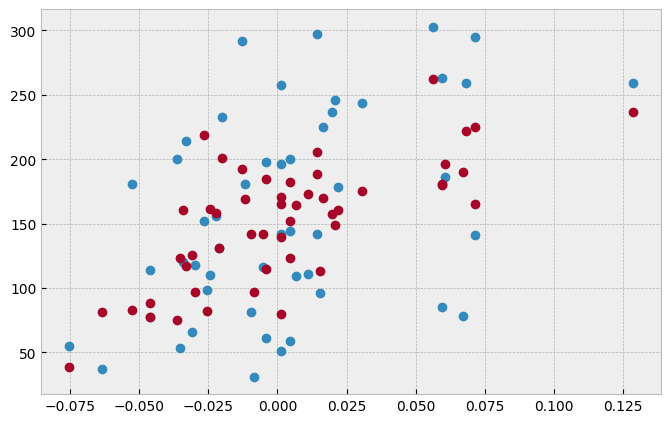

In [25]:
# Plot the test data and the model's predictions for the third feature
# Try different features to see how the model performs
plt.plot(test_X[:, 2:3], test_y, 'o');
plt.plot(test_X[:, 2:3], regr.predict(test_X), 'o');

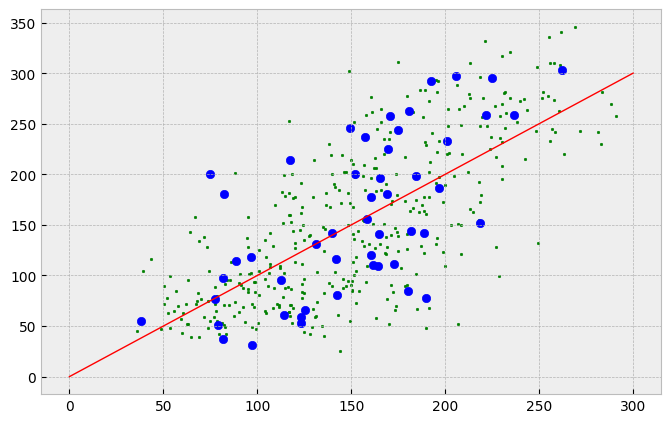

In [26]:
# Another way to visualize the results is to plot the predicted values against the true values
plt.scatter(regr.predict(train_X), train_y, c='g', s=3)
plt.scatter(regr.predict(test_X), test_y, c='b')
plt.plot([0,300],[0,300],'r', linewidth=1);

/tmp/ipykernel_953030/287613357.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([train_y[(predict_y>=i-30)&(predict_y< i+30)] for i in groups], labels=groups);


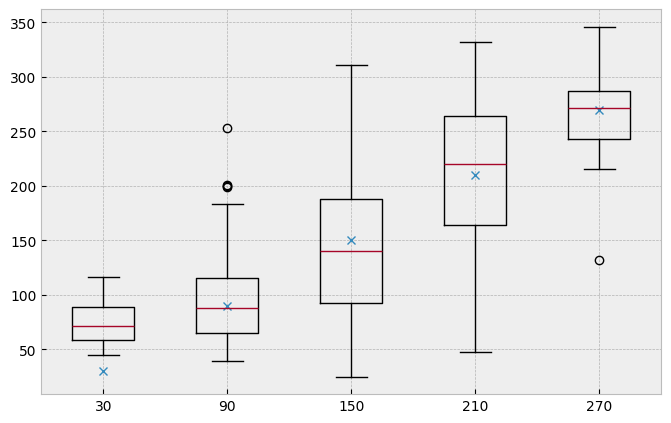

In [27]:
# Can use boxplot to see how well the model is doing to have a sense of the error
groups = np.arange(30,300,60)
predict_y=regr.predict(train_X)
plt.boxplot([train_y[(predict_y>=i-30)&(predict_y< i+30)] for i in groups], labels=groups);
plt.plot(np.arange(1,len(groups)+1), groups,'x');

## Overfitting

https://tjwei.github.io/NeuralNetwork-Jobspace-slides/#/7

### Regularization
$\frac{1}{2  n} \left\Vert y - Xw\right\Vert_2^2 + α \left\Vert w \right\Vert_1$

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

$ \left\Vert w \right\Vert_1 = \sum_{i=0}^{10} |w_i|$

$ \left\Vert w \right\Vert_2 = \sqrt{\sum_{i=0}^{10} |w_i|^2}$

$ \left\Vert w \right\Vert_p = (\sum_{i=0}^{10} |w_i|^p) ^ {\frac{1}{p}}$

In [28]:
regr = linear_model.Lasso(alpha=0.2)
regr.fit(train_X, train_y)
np.mean((regr.predict(train_X)-train_y)**2)

2928.8165734610425

In [29]:
np.mean((regr.predict(test_X)-test_y)**2)

3726.0942674027374

### Cross validation
https://en.wikipedia.org/wiki/Cross-validation_(statistics)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

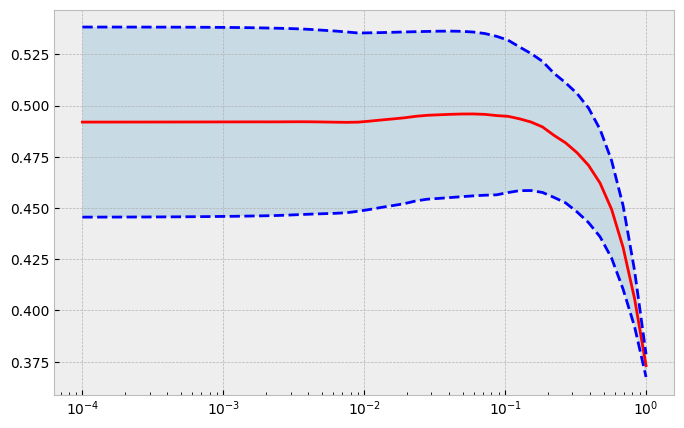

In [30]:
from sklearn import model_selection
α_space = np.logspace(-4, 0, 50)
scores =[]
for α in α_space:    
    regr.alpha = α
    s = model_selection.cross_val_score(regr, train_X, train_y, cv=3)
    scores.append((s.mean(), s.std()))
scores=np.array(scores).T
plt.semilogx(α_space, scores[0], 'r')
plt.semilogx(α_space, scores[0]+scores[1],'b--')
plt.semilogx(α_space, scores[0]-scores[1],'b--')
plt.fill_between(α_space, scores[0] + scores[1], scores[0] - scores[1], alpha=0.2);

### Model selection: LassoCV
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

$R^2-score$ : https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions

In [31]:
regr = linear_model.LassoCV(alphas = α_space, cv=3)
regr.fit(train_X, train_y)
print('α=', regr.alpha_)
print("training score:", regr.score(train_X, train_y))
# compute R^2 score from definition
print(1-np.mean((regr.predict(train_X)-train_y)**2)/np.var(train_y))

α= 0.05963623316594643
training score: 0.5236034966094946
0.5236034966094946


In [32]:
print("validation score:", regr.score(test_X, test_y))

validation score: 0.41196001592879794


more about model selection: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

### Can we use Linear regression to do classification ?

0.39579693265555865

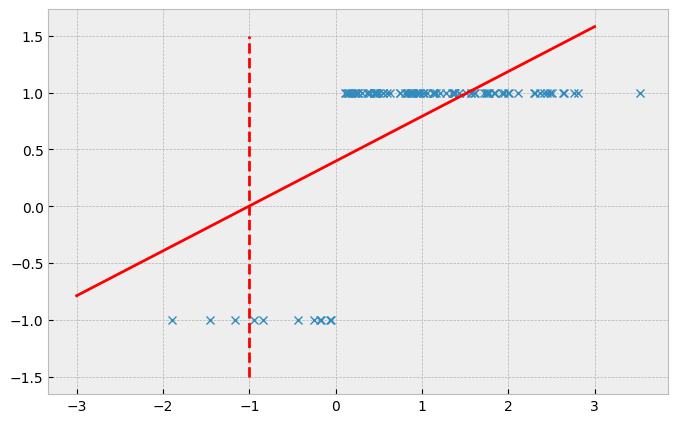

In [33]:
X = np.random.normal(1, size=(100,1))
y = (X[:,0]>0).ravel()*2-1
regr = linear_model.LinearRegression().fit(X, y)
test_X=np.linspace(-3,3,10).reshape(-1,1)
plt.plot(X, y, 'x');
plt.plot(test_X, regr.predict(test_X), 'r')
plt.plot([-regr.intercept_/regr.coef_[0]]*2, [-1.5,1.5], 'r--')
regr.intercept_

In [34]:
regr.intercept_

0.39579693265555865

## MNIST
that being said, let us try to apply linear regression on MNIST

In [35]:
# Download the MNIST dataset using '01-From NumPy to Mnist.ipynb'
# if you haven't done so already
def read_dataset(prefix):
    images = np.fromfile(prefix + '-images.idx3-ubyte', dtype='uint8', offset=16).reshape(-1, 28*28)/255
    labels = np.fromfile(prefix + '-labels.idx1-ubyte', dtype='uint8', offset=8)
    return images, labels
train_set = read_dataset('train')
test_set = read_dataset('t10k')
train_X, train_y = train_set
test_X, test_y = test_set

In [36]:
from rich import print
print(f'{train_X.shape=} {train_y.shape=}')

train_X.shape=(60000, 784) train_y.shape=(60000,)

In [37]:
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)
print(regr.predict(test_X))

[6.34735857 2.29334968 1.62040853 ... 7.90265476 5.47910371 5.78704278]

In [38]:
predict_y = np.floor(regr.predict(train_X)+0.5).clip(0,9).astype('int')
np.mean(predict_y == train_y)

0.23591666666666666

In [39]:
predict_y = np.floor(regr.predict(test_X)+0.5).astype('int').clip(0,9)
np.mean(predict_y == test_y)

0.2296

23% is a pretty poor

### One hot encoding

In [40]:
train_Y = np.zeros(shape=(train_y.shape[0], 10))
train_Y[np.arange(train_y.shape[0]), train_y] = 1

In [41]:
train_y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [42]:
print(train_Y[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

In [43]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(train_y.reshape(-1,1))
onehot_encoder.transform(train_y.reshape(-1,1)).toarray()[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [44]:
# train the model
regr.fit(train_X, train_Y)

# use argmax to find the result
predict_y = np.argmax(regr.predict(train_X), axis=1)
# calculate the accuracy
np.mean(predict_y == train_y)

0.85745

In [45]:
print(np.round(regr.predict(test_X),3) )

[[ 0.028  0.004  0.1   ...  0.909 -0.078  0.079]
 [ 0.222 -0.234  0.828 ... -0.033 -0.024 -0.093]
 [ 0.042  0.748  0.041 ...  0.052 -0.06   0.021]
 ...
 [-0.246 -0.034 -0.008 ...  0.183  0.16   0.27 ]
 [-0.061  0.012 -0.066 ... -0.006  0.445 -0.207]
 [ 0.071 -0.14   0.06  ...  0.031 -0.127 -0.036]]

In [46]:
predict_y = np.argmax(regr.predict(test_X), axis=1)
print(predict_y)

[7 2 1 ... 4 5 6]

In [47]:
np.mean(predict_y == test_y)

0.8604

## Q
try test accuracy

In [48]:
%run -i q_minst_linear_regression.py

0.8604

<Figure size 800x500 with 0 Axes>

## Feature Engineering

In [131]:
# try some random features
# shold take a few minutes
M = np.random.uniform(-1, 1, size=(784,16384)) # try a smaller size like 4000 if it is too slow. Try a larger size like 16384 to see if it is better

train_X2 = np.abs(train_X @ M)
test_X2 = np.abs(test_X @ M)

In [132]:
# should take a few minutes
regr = linear_model.LinearRegression()
regr.fit(train_X2, train_Y)

LinearRegression()

In [133]:
predict_y = np.argmax(regr.predict(train_X2), axis=1)
# calculate the accuracy
np.mean(predict_y == train_y)

0.9984333333333333

In [134]:
predict_y = np.argmax(regr.predict(test_X2), axis=1)
# calculate the accuracy
np.mean(predict_y == test_y)

0.981